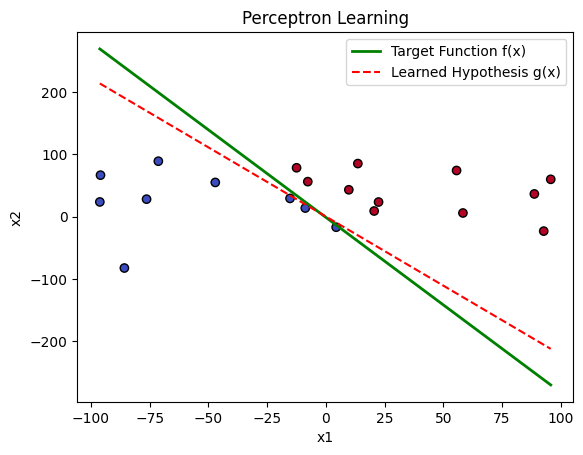

Number of updates for N=20: 9


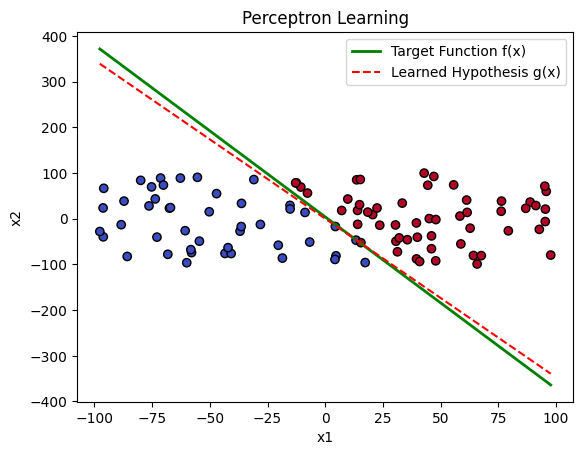

Number of updates for N=100: 76


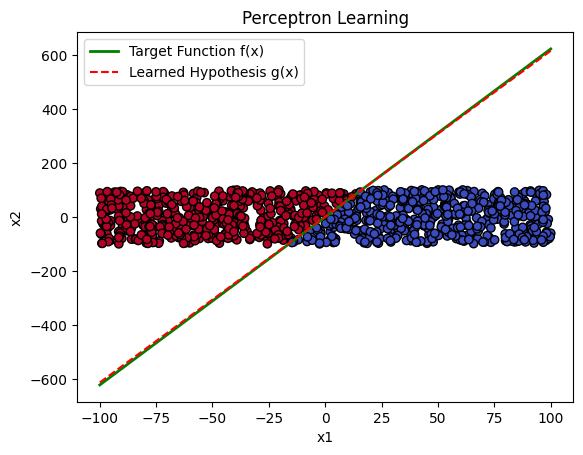

Number of updates for N=1000: 295


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron learning algorithm
def getHypothesisVector(data):
    # initialize vector w by the first input data
    w = np.array([0, data[0][0], data[0][1]])  # [w0, w1, w2]
    update = True
    rounds = 0
    while update:
        rounds += 1
        update = False
        for i in range(len(data)):
            x = np.array([1, data[i][0], data[i][1]])  # adding the bias term as 1
            label = data[i][2]
            g = w.dot(x)
            hypothesis = 1 if g > 0 else -1

            # if hypothesis misclassified
            if not hypothesis * label > 0:
                w = w + label * x
                update = True
                break
    return {'g': w, 'rounds': rounds}

# Problem 1.4 (a)
# Function to generate random linearly separable data
def generate_linearly_separable_data(N, lb, ub, coeff_lb, coeff_ub):
    np.random.seed(0)
    X = np.random.uniform(lb, ub, (N, 2))  # N points in 2D space

    # Generate a random target function (line) in the form y = mx + c
    m = np.random.uniform(coeff_lb, coeff_ub)
    c = np.random.uniform(coeff_lb, coeff_ub)
    
    # Label the points based on the line: y = mx + c
    Y = []
    for x1, x2 in X:
        if x2 > m * x1 + c:
            Y.append(1)  # Above the line is positive class
        else:
            Y.append(-1)  # Below the line is negative class
    
    return list(zip(X[:, 0], X[:, 1], Y)), m, c

# Plotting function
def plot_data_and_hypothesis(X, Y, target_func, hypothesis, m, c):
    # Plot the data points with different colors for different classes
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k', marker='o')

    # Plot the target function (line) - y = mx + c
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = m * x_vals + c  # Target function line
    plt.plot(x_vals, y_vals, label='Target Function f(x)', color='green', linewidth=2)
    
    # Plot the learned hypothesis (decision boundary)
    w = hypothesis['g']
    slope = -w[1] / w[2]
    intercept = -w[0] / w[2]
    y_hypothesis = slope * x_vals + intercept
    plt.plot(x_vals, y_hypothesis, label='Learned Hypothesis g(x)', color='red', linestyle='dashed')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Perceptron Learning')
    plt.show()

# Problem 1.4 (b)
# Function to run the experiment and plot results
def run_experiment(N, lb, ub, coeff_lb, coeff_ub, maxit):
    # Generate linearly separable data
    data, m, c = generate_linearly_separable_data(N, lb, ub, coeff_lb, coeff_ub)

    # Apply the perceptron algorithm
    result = getHypothesisVector(data)

    # Plot the results
    X = np.array([d[0:2] for d in data])
    Y = np.array([d[2] for d in data])
    
    plot_data_and_hypothesis(X, Y, None, result, m, c)

    print(f"Number of updates for N={N}: {result['rounds']}")

 
lb, ub = -100, 100
coeff_lb, coeff_ub = -10, 10
maxit = 100

# Problem 1.4 (c) Repeat for N = 20
run_experiment(20, lb, ub, coeff_lb, coeff_ub, maxit)

# Problem 1.4 (d) Repeat for N=100
run_experiment(100, lb, ub, coeff_lb, coeff_ub, maxit)

# Problem 1.4 (e) Repeat for N=1000
run_experiment(1000, lb, ub, coeff_lb, coeff_ub, maxit)


In [ ]:
# Conclusion
# A smaller N means more updates, and the hypothesis might be further from the target function.
# As N increases, the perceptron algorithm will converge faster and the learned hypothesis will be closer to the target function.
